
Travelling Salesman Problem
---

---


Travelling Salesman Poblem (TSP) sebuah permasalahan dalam sebuah perjalanan yang bertujuan untuk mendapat rute terpendek jika destinasi lebih dari satu tanpa kembali ke tempat yang sama. Permasalahan ini termasuk dalam NP-Complete problems. Terdapat berbagai macam algoritma untuk penyelesaian yang akan dibahas dalam notebook ini.


In [22]:
import math
import random
import itertools

In [16]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def GetDistance(self, anotherCity):
        return math.sqrt((self.x - anotherCity.x)**2 + (self.y - anotherCity.y)**2)

In [28]:
class Graph:
    graph = []
    adj_matrix = []

    def __init__(self, n):
        self.n = n

    def CreateGraph(self, max_k = 100):
        if len(self.graph) > 0: return
        for i in range(self.n):
            while True:
                x, y = random.randint(0, max_k), random.randint(0, max_k)
                if City(x,y) not in self.graph:
                    self.graph.append(City(x,y))
                    break
        self.GetAdjMatrix()
        return self

    def GetAdjMatrix(self):
        if len(self.adj_matrix) > 0: return
        if len(self.graph) == 0: self.CreateGraph()
        self.adj_matrix = [[self.graph[i].GetDistance(self.graph[j]) for i in range(self.n)] for j in range(self.n)]


In [23]:
class Tour:
    def __init__(self, path, gra):
        self.path = path
        self.gra = gra

    def GetDistance(self):
        dist = 0
        for i in range(len(self.path)-1):
            dist += self.gra.adj_matrix[self.path[i]][self.path[i+1]]
        return dist

Metode Brute Force

---
Metode brute force adalah metode yang melakukan iterasi terhadap setiap kasus perjalanan yang ada. Algoritma ini memiliki kompleksitas O((n-1)!). Kompleksitas tersebut membuat metode brute dorce menjadi lambat untuk dijalankan. Namun demikian, rute yang dihasilkan akan selalu rute terpendek karena sudah mengecek setiap kondisi yang ada.





In [26]:
class BruteForce:
    path = []
    dist = 10**10

    def __init__(self, gra):
        self.gra = gra
    
    def GetAllPath(self):
        indeks = [a for a in range(1, len(self.gra.n))]
        for perm in list(itertools.permutations(indeks)):
            perm = list(perm)
            perm.insert(0,0), perm.append(0)
            tour = Tour(perm, self.gra)
            res = tour.GetDistance()
            if self.dist > res:
                self.dist = res
                path = perm
            print(perm, res)

    def GetDist(self):
        indeks = [a for a in range(1, len(self.gra.n))]
        for perm in list(itertools.permutations(indeks)):
            perm = list(p)
            perm.insert(0,0), perm.append(0)
            tour = Tour(perm, self.gra)
            res = tour.GetDistance()
            if self.dist > res:
                self.dist = res
                path = perm

In [30]:
temp = Graph(5)
BruteForce(Graph(5).CreateGraph().graph).GetAllPath()

AttributeError: 'NoneType' object has no attribute 'graph'

Algoritma Greedy


---
Algoritma ini dilakukan dengan langsung mengambil jarak terpendek dari satu tempat ke tempat lainnya. Kelebihan algoritma ini adalah kompleksitas-nya tergolong kecil, yaitu O(n-1). Akan tetapi, kekurangan dari algoritma ini adalah rute yang dihasilkan tidak selalu menjadi yang terpendek, namun untuk kebanyakan kasus hasilnya sudah cukup baik.


In [3]:
def Greedy(rute):
    n = len(rute)
    visited = [False for a in range(n)]
    visited[0] = True
    path = [0]
    distance = 0
    for i in range(n-1):
        distance_now = 10**10
        for j in range(n):
            if (visited[j]):
                continue
            if (rute[path[i]][j] < distance_now):
                distance_now = rute[path[i]][j]
                place = j
        visited[place] = True
        path.append(place)
        distance += distance_now
    distance += rute[path[n-1]][0]
    path.append(0)
    return distance

Heuristik

---
Metode heuristik adalah metode melakukan subtour untuk tempat yang dikunjungi mulai dari (0,0), dan dari (0,0) akan dibuat subtour, seperti (0,1)->(1,0), (0,2)->(2,0) dan seterusnya. Metode heuristik akan langsung mengambil rute dengan penambahan jarak terkecil dalam setiap penggantian subtournya. 

In [4]:
def Heuristik(rute):
    n = len(rute)
    count = 2
    visited = [False for a in range(n)]
    path = [0,0]
    visited[0] = True
    distance = 0
    for i in range(n-1):
        distance_now = 10**10
        place = []
        for j in range(1,count):
            for k in range(n):
                if (visited[k]):
                    continue
                substitute = rute[path[j-1]][k] + rute[k][path[j]] - rute[path[j-1]][path[j]]
                if (substitute < distance_now):
                    distance_now = substitute
                    place = [k,j]
        distance += distance_now
        visited[place[0]] = True
        path.insert(place[1], place[0])
        count += 1
    return distance

Uji Keefektifan Algoritma yang Tersedia dengan Metode Brute Force

---

In [5]:
import random
import math

def CreateGraph(n):
    location = []
    for i in range(n):
        while True:
            x, y = random.randint(-100, 100), random.randint(-100, 100)
            if [x,y] not in location:
                location.append([x,y])
                break
    graph = [[math.ceil(math.sqrt((location[i][0]-location[j][0])**2 + (location[i][1]-location[j][1])**2)) for i in range(n)] for j in range(n)]
    return graph

In [8]:
total_test = 100
total_city = 10
accuracy_greedy = []
accuracy_heuristic = []
mae_greedy = []
mae_heuristic = []
for city in range(3, total_city+1):
    count_gr = count_he = 0
    err_gr = err_he = 0
    for i in range(total_test):
        generated = CreateGraph(city)
        bf = BruteForce(generated)
        gr = Greedy(generated)
        he = Heuristik(generated)
        if (bf == he):
            count_he += 1
        if (bf == gr):
            count_gr += 1
        err_gr += gr - bf
        err_he += he - bf
    accuracy_greedy.append(count_gr)
    accuracy_heuristic.append(count_he)
    mae_greedy.append(err_gr / total_test)
    mae_heuristic.append(err_he / total_test)

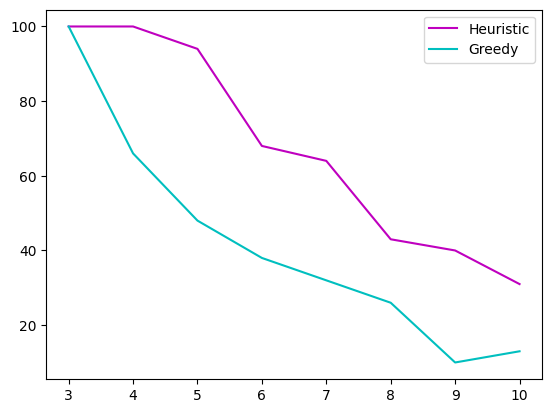

In [12]:
import matplotlib.pyplot as plt
temp = [a for a in range(3, total_city+1)]
plt.plot(temp, accuracy_heuristic, 'm', label='Heuristic')
plt.plot(temp, accuracy_greedy, 'c', label='Greedy')
plt.legend(loc='upper right')
plt.show()

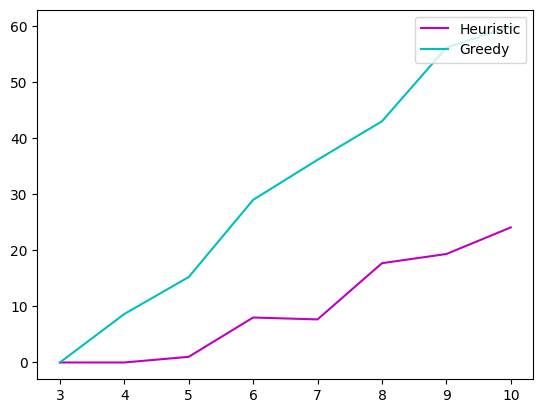

In [11]:
import matplotlib.pyplot as plt
temp = [a for a in range(3, total_city+1)]
plt.plot(temp, mae_heuristic, 'm', label='Heuristic')
plt.plot(temp, mae_greedy, 'c', label='Greedy')
plt.legend(loc='upper right')
plt.show()